In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

# **Contrast Stretching**

In [2]:
# Function to map each intensity level to output intensity level.
def pixelVal(pix, a, b, l, m, n):
  v = l*a 
  w = m*(b-a) + v
  if (0 <= pix and pix <= a):
      return (v / a)*pix
  elif (a < pix and pix <= b):
      return ((w - v)/(b - a)) * (pix - a) + v
  else:
      return ((255 - w)/(255 - b)) * (pix - b) + w

In the range 


*   l, n < 1
*   m >= 1



In [7]:
img = cv2.imread('pout.png', 0)

a = 60
b = 140 
l_1 = 0.1
m_1 = 1.5 
n_1 = 0.6

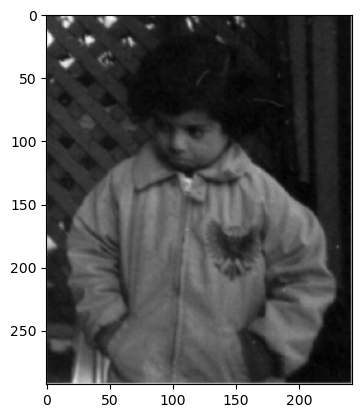

In [8]:
plt.imshow(img, cmap='gray')

In [9]:
img.min()

75

In [10]:
img.max()

223

In [11]:
pixelVal_vec = np.vectorize(pixelVal)

In [12]:
contrast_stretched_1 = pixelVal_vec(img, a, b, l_1, m_1, n_1)

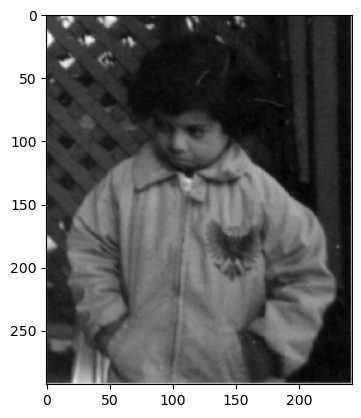

In [13]:
plt.imshow(contrast_stretched_1, cmap='gray')

In [14]:
contrast_stretched_1.min()

28.5

Outside the range 


*   l, n > 1
*   m < 1



In [15]:
a = 60
b = 140 
l_2 = 1.5 
m_2 = 0.5 
n_2 = 2

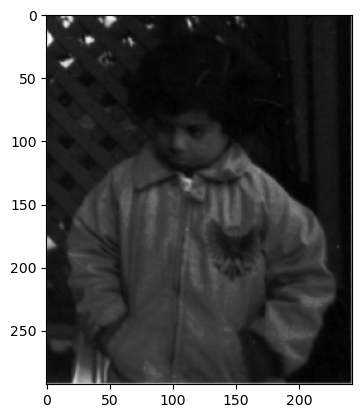

In [16]:
contrast_stretched_2 = pixelVal_vec(img, a, b, l_2, m_2, n_2)
plt.imshow(contrast_stretched_2, cmap='gray')

In [17]:
contrast_stretched_2.min()

97.5

# **Log Transformation**

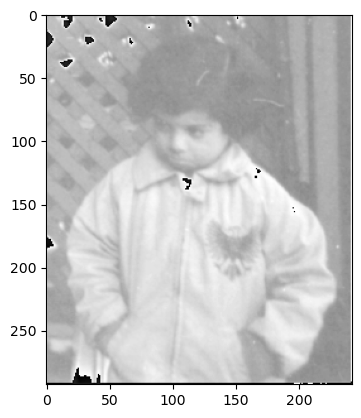

In [18]:
c = 150
log_transformed = c*np.log(img + 1) 

log_transformed = np.array(log_transformed, dtype = np.uint8)

plt.imshow(log_transformed, cmap='gray')

# **Power Law Transformation**

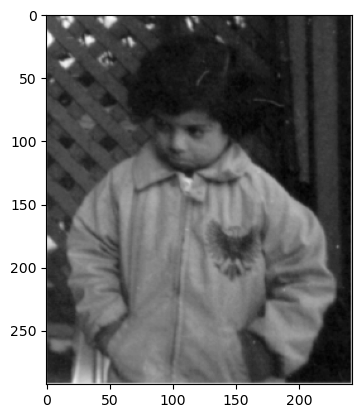

In [19]:
gamma_1 = 0.2 
gamma_2 = 2.5 

power_transformed_1 = img**gamma_1 
plt.imshow(power_transformed_1, cmap='gray')

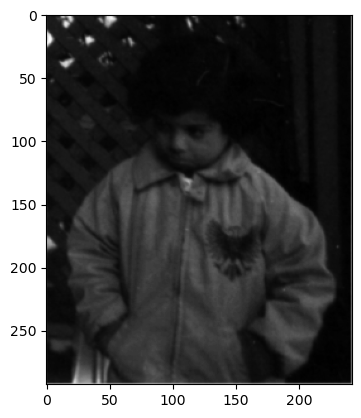

In [20]:
power_transformed_2 = img**gamma_2 
plt.imshow(power_transformed_2, cmap='gray')